# Linear Regression

## First part - Necessary Code

In [1]:
import numpy as np
import json
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

In [2]:
# Import company colors
with open('plot_colors.json', 'r') as pc:
    color_dict = json.load(pc)

c_light, c_dark, c_blue = color_dict['color_light'], color_dict['color_dark'], color_dict['color_blue']

# Define color map for plotting
color_map = ListedColormap([c_blue, c_light, c_dark])

### Linear regression equation plot

In [3]:
def linear_eq(annotate=False):

    plt.rcParams.update({'font.size': 15})

    # Generate x values
    x = np.linspace(0, 10, 100)

    # Calculate y values
    y = 2 + 1/3 * x
    circle1 = plt.Circle((3, 3), 0.15, color='orange', fill=True)
    circle2 = plt.Circle((6, 4), 0.15, color='orange', fill=True)


    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)

    # Create the plot
    plt.plot(x, y)

    # Add labels and title
    plt.xlim(0,7)
    plt.ylim(0.6)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()

    if annotate:
        # Annotate the intercept
        plt.annotate('y-intercept',
                     xy=(0, 2),
                     xytext=(-90, 30),
                     textcoords='offset points',
                     arrowprops=dict(arrowstyle='->'))

        # Annotate general equation
        plt.annotate(r'$ y = b_0 + b_1*x $',
                     xy=(7, 4.2),
                     xytext=(5, 5),
                     textcoords='offset points')

        # Annotate slope
        plt.annotate(r'$ b_1 = \frac{\Delta y}{\Delta x}$',
                     xy=(7, 2.5),
                     xytext=(5, 5),
                     textcoords='offset points')

        # Annotate equation
        plt.annotate(r'Equation : $ y = 2 + \frac{1}{3}*x$',
                     xy=(7, 0.8),
                     xytext=(8, 8),
                     textcoords='offset points')
        
        # Annotate delta x and y arrows
        arrowstyle1 = FancyArrowPatch((6, 3), (6, 4),
                                 connectionstyle="arc3,rad=0.2", arrowstyle='<->, head_width=0.3',
                                 lw=1.5, mutation_scale=10, color='black')
        plt.gca().add_patch(arrowstyle1)
        
        arrowstyle2 = FancyArrowPatch((3, 3), (6, 3),
                                 connectionstyle="arc3,rad=0.2", arrowstyle='<->, head_width=0.3',
                                 lw=1.5, mutation_scale=10, color='black')
        
        plt.gca().add_patch(arrowstyle2)
        
        plt.annotate(r'$ \Delta y $',
             xy=(6.1, 3.3),
             xytext=(6.1, 3.3),
             textcoords='offset points')
        plt.annotate(r'$ \Delta x $',
             xy=(4.1, 2.3),
             xytext=(4.1, 2.3),
             textcoords='offset points')

    # Display the plot
    #plt.show()

### Linear regression example plot

In [4]:
def generate_data(num_points):
    np.random.seed(4)
    x = np.random.uniform(low=0, high=12, size=num_points)
    noise = np.random.normal(loc=0, scale=0.8, size=num_points)
    y = 0.3 + 0.5 * x + noise
    x = x[y > 0]
    y = y[y > 0]
    X = np.column_stack((np.ones(len(x)), x))
    X_df = pd.DataFrame(X, columns=['intercept', 'Week of bootcamp'])
    X_df['Coffee consumption in [l]'] = y
    return X_df, X, y.reshape(-1, 1)

num_points=50
data, X, y = generate_data(num_points)

In [5]:
data_lines = data.copy()

x_mean = data_lines['Week of bootcamp'].mean()
y_mean = data_lines['Coffee consumption in [l]'].mean()

reg_lines = pd.DataFrame(columns = ("b1", "b0", "p_at_0", "p_at_12", "sum_of_squared_residuals", "sum_of_residuals"))

for b1 in [0.1, 0.3, 0.4, 0.5, 0.6, 0.8, 1]:
    # for each scope calculate a so every line goes through the mean of the data points
    b0 = y_mean - b1*x_mean
    
    # getting the plotting points at x = 1 and x = 11 (to define a line)
    p1 = b0 + b1*0
    p2 = b0 + b1*12
    
    data_lines.loc[:,f'prediction_b_{b1}'] = b0 + b1 * data_lines['Week of bootcamp']
    data_lines[f"residuals_{b1}_sq"]= (data_lines['Coffee consumption in [l]'] - data_lines[f'prediction_b_{b1}'])**2
    data_lines[f"residuals_{b1}"]= (data_lines['Coffee consumption in [l]'] - data_lines[f'prediction_b_{b1}'])
    ssr = sum(data_lines[f"residuals_{b1}_sq"])
    sr = sum(data_lines[f"residuals_{b1}"])
    
    reg_lines.loc[len(reg_lines.index)] = [b1, b0, p1, p2,  ssr, sr] 

### Plot data

In [6]:
def plot_data(x, y, reg_data=None, figsize=(10,6), regression_line=False, residuals=False, line_selection=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    
    sns.set_context("talk", font_scale=0.8, rc={"lines.linewidth": 2.})
    
    # Plot scatter and regression line if set to True
    sns.regplot(x=x, y=y, scatter_kws={'s':30, "alpha": 1, "color": c_blue},
                ci=None, color=c_light, fit_reg=regression_line, ax=ax)
    
    if residuals:
        b1, b0 = np.polyfit(x, y, 1)
        regression_line = b0 + b1*x
        for i in range(len(x)):
            ax.plot([x[i], x[i]], [y[i], regression_line[i]], color=c_dark, linewidth=1)
            
    if isinstance(reg_data, pd.DataFrame):
        colors=["#191970", "#3765b5", "#617baa", "#bac2ca", "#617baa", "#191970", "#570f4c"]
        if line_selection != None:
            for j, line in reg_data.iterrows():
                if j in line_selection:
                    ax.plot([0, 12], [line["p_at_0"], line["p_at_12"]], color=colors[j], linewidth=2)
        else:
            for j, line in reg_data.iterrows():
                ax.plot([0, 12], [line["p_at_0"], line["p_at_12"]], color=colors[j], linewidth=2)

    
    ax.set_xlabel('Week of bootcamp')
    ax.set_ylabel('Coffee consumption [l]')
    sns.despine()

### Fitted lines with residuals plot

In [7]:
def plot_possible_lines_with_residuals(x, y, reg_data=None, figsize=(10,6), line_index=3, residuals=False, ssr=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    
    sns.set_context("talk", font_scale=0.8, rc={"lines.linewidth": 2.})
    
    # Plot scatter and regression line if set to True
    sns.regplot(x=x, y=y, scatter_kws={'s':30, "alpha": 1, "color": c_blue},
                ci=None, color=c_light, fit_reg=False, ax=ax)
    
    #colors = ['#570f4c', 'darkblue', '#bac2ca', 'grey', '#191970', '#907390', '#570f4c']
    colors=["#191970", "#3765b5", "#617baa", "#bac2ca", "#617baa", "#191970", "#570f4c"]
    
    ax.plot([0, 12],[reg_lines["p_at_0"][line_index], reg_lines["p_at_12"][line_index]], color=colors[line_index], linewidth=2)
    
    if residuals:
        regression_line = reg_data.loc[line_index, 'b0'] + reg_data.loc[line_index, 'b1']*x
        for i in range(len(x)):
            ax.plot([x[i], x[i]], [y[i], regression_line[i]], color=c_dark, linewidth=1)
            
    if ssr:   
        ax.annotate(text=f"SSR = {reg_data.loc[line_index, 'sum_of_squared_residuals'].round(2)}",
        xy=(0, 7),
        xytext=(1, 2),
        textcoords='offset points')
            
    ax.set_xlabel('Week of bootcamp')
    ax.set_ylabel('Coffee consumption [l]')
    sns.despine()

### Loss of different regression lines plot

In [8]:
def loss_reg_lines(reg_data, figsize=(10,6), ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    
    sns.set_context("talk", font_scale=0.8, rc={"lines.linewidth": 2.})
    colors=["#191970", "#3765b5", "#617baa", "#bac2ca", "#617baa", "#191970", "#570f4c"]
    # plotting ssr for 5 regression lines
    sns.scatterplot(reg_data, x ="b1", y = "sum_of_squared_residuals", color=colors, s=200)
    plt.xlabel("$b_1$")
    plt.ylabel("sum of squared residuals (SSR)")
    plt.title("Loss of different regression lines")
    sns.despine()

## Second part - Lecture

<div class="slide-title"> 
        
# Linear Regression
           
</div> 

## Motivation


### Goals of Linear regression

<div class="group">
  <div class="text">
      
* I own a house in King County!
* It has 3 Bedrooms, 2 Bathroom, a nice 10.000 sqft lot and is only 10km away from Bill Gates mansion!

* If only I had a way of estimating what it is worth...
      
      
  </div>
  <div class="images">
    <img src="../images/linear_regression/img_p3_1.png">
  </div>

</div>


### If only I had a way of estimating what it is worth...


<div class="group">
  <div class="text">  
      
* Use training data to ...
* ... find a similar house ...  
* ... and use its value for estimation.
  </div>
  <div class="text">   
* Use training data to ...
* ... find a general rule that ...
* ... can be used for estimation.
  </div>
</div>


Notes: "general rule": e.g. a regression model to quantify a response variable (y) using a predictor variable (x)

### I should train a Regression Model!

```
    216.645 $ Basis-price

+   20.033 $ for each bedrooms

+  234.314 $ for each bathrooms

+        1 $ for each sqft lot

-   14.745 $ for each km distance from Bill Gate Mansion

= xyz $ estimated house price
```

<div class="alert alert-block alert-info">
<b>Note:</b><br>
    The term regression (e.g. regression analysis) usually
    refers to <i>linear</i> regression.<br>
    (Don't confuse with <i> logistic </i> regression.)
</div>

Notes: This "forumula" is one possible kind of model, representing a certain aspect of reality.

### Building a model

<div class="group">
  <div class="text">
  <h4> Descriptive statistics </h4> 
  Using LR for explanation (profiling)
      
  &rarr; Why is my house worth xyz?
      
  &rarr; How can I increase the price?
      
  <h4> Inferential statistics </h4> 
  Using LR to make predictions
      
  &rarr; How much is my house worth?

      
  </div>
  <div class="images">
    <img src="../images/linear_regression/img_p6_1.png">
  </div>

</div>


Notes: There are two methods in statitics:  
- descriptive (&rarr; EDA) and  
- inferential (&rarr; ML)

## Linear Equation

### Linear Equation
#### Q: What is the equation of the line?

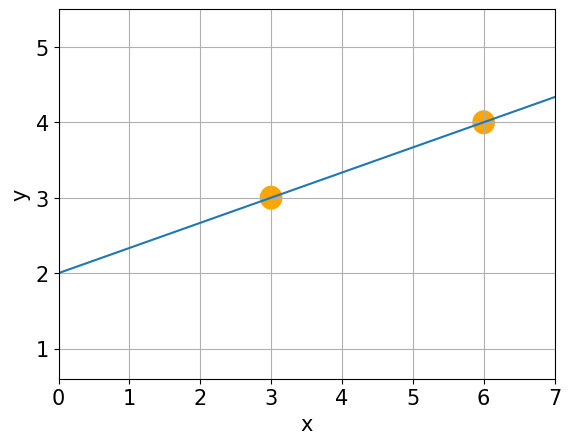

In [9]:
linear_eq()

### Linear Equation


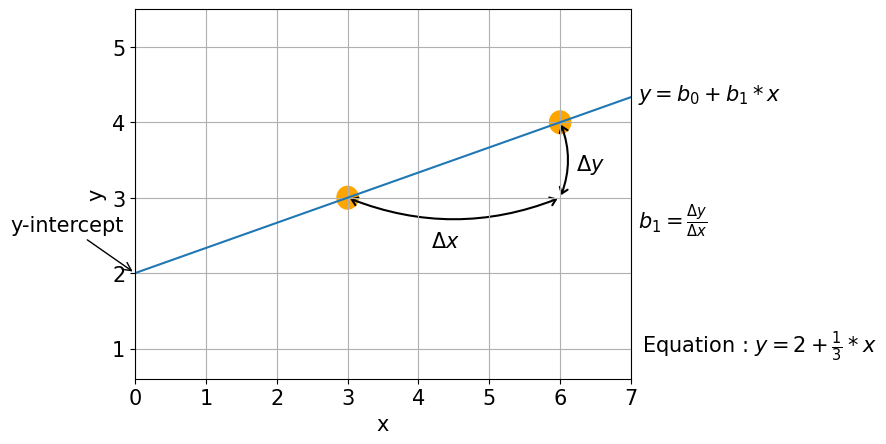

In [10]:
linear_eq(annotate=True)

<div class="alert alert-block alert-info">
<b>Key terms:</b> 

* Intercept (b0, value of y when x = 0)
 
* Slope (b1, weights)
</div>

Show how to calculate slope and intercept for two points (x1, y1) and (x2, y2)  
(2 eq., 2 unknowns)

## Linear Regression

### Linear Regression

* Is the variable X associated with a variable y, and if so,

* what is the relationship and can we use it to predict y?


<div class="alert alert-block alert-info">
<b>Note:</b><br> 

* Correlation &mdash; measures the strength of the relationship &rarr; a number
 
* Regression &mdash; quantifies the nature of the relationship &rarr; an equation
</div>


### What about more than 2 points?

<center>
<img src="../images/linear_regression/img_p14_1.png" width=600>  
</center>

Notes:  
Let students suggest some regressions (draw into zoom window).  
Would a non-linear model be sensible?  
Are the suggestions of different quality?  
What is the line good for?   
&rarr; we need a quantitative measure to decide what is "good".

### Let’s look at an example

<div class="group">
  <div class="text"> 
      
**Two correlated variables:**

* week of bootcamp, $x$
* coffee consumption, $y$
* $r=0.9$   
  </div>
    
  <div class="images">

$ y=b_{0}+b_{1}\cdot x+e$
 
→ Find $ b_0 $ and $ b_1 $ !
  </div>
</div>

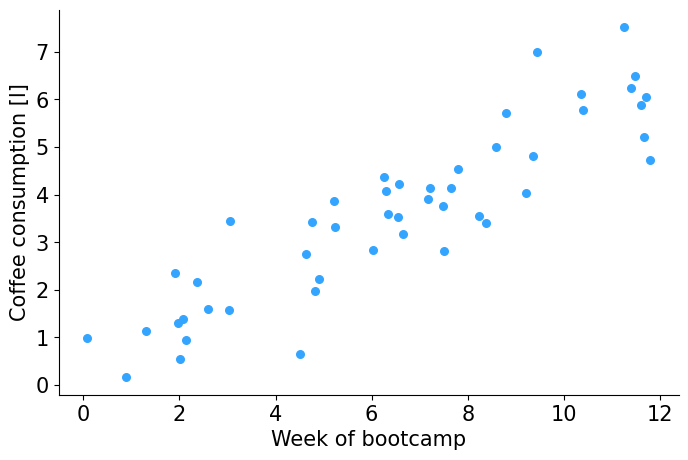

In [11]:
plot_data(data['Week of bootcamp'], data['Coffee consumption in [l]'], figsize=(8,5))

### Trying out some lines. Which one is better?

      
* Grey: $ \hat{y} = 0.35 + 0.5 \cdot x $
* Blue: $ \hat{y} = 1.65 + 0.3 \cdot x $

<div class="alert alert-block alert-info">
<b>Note:</b> <br>
    <b>^ - the “hat” notation means the value is estimated </b>(the lines) as opposed to a known value (the dots). <br>The estimate has uncertainty (!) whereas the true value is fixed.
</div>

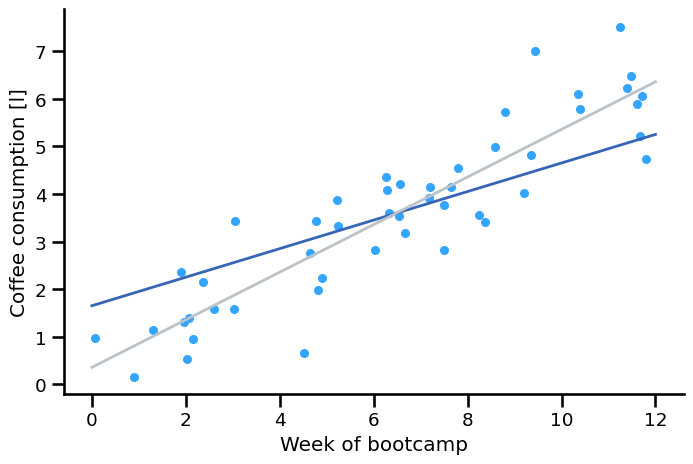

In [12]:
plot_data(data['Week of bootcamp'], data['Coffee consumption in [l]'], figsize=(8,5), reg_data=reg_lines, line_selection=[1, 3])

Notes:  
remind that the nice looking line is just the model, while ...  
... the not so nice looking dots are our valuable reality!  
(Not the dots have a deviation from the line but the line has a deviation from the dots!)

### How do we know which line is better?

### Residuals

$e_i = y_i - \hat{y}_i$  
      
which means:
      
$y_i = b_0 + b_1 \cdot x_i + e_i$

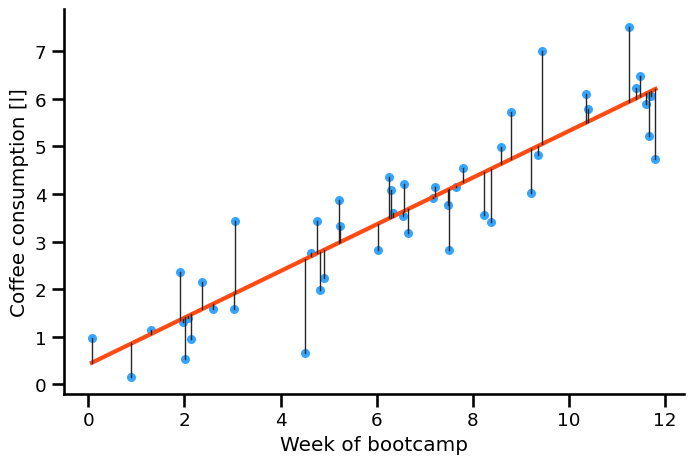

In [13]:
plot_data(data['Week of bootcamp'], data['Coffee consumption in [l]'], figsize=(8,5), regression_line=True, residuals=True)

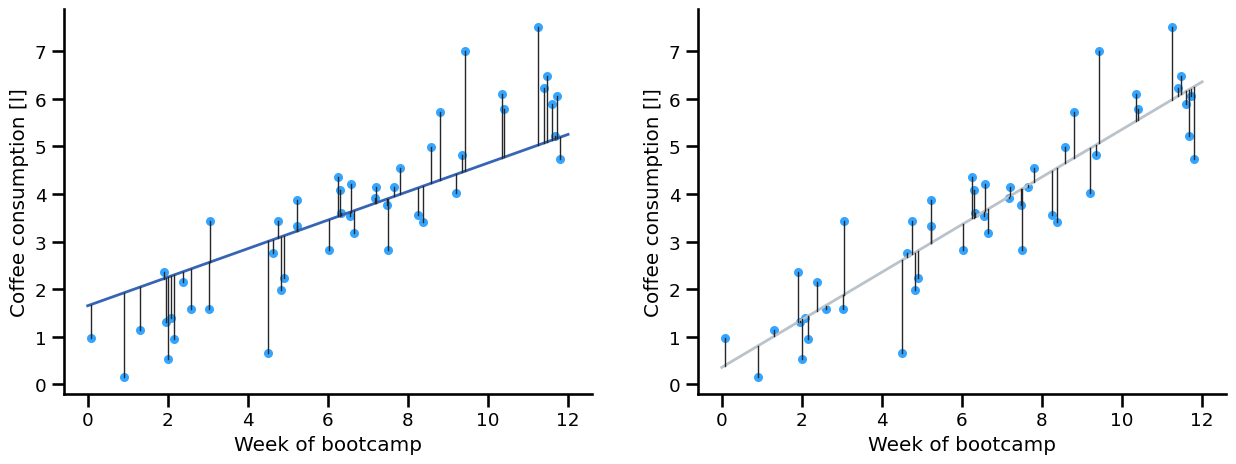

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_possible_lines_with_residuals(data['Week of bootcamp'], data['Coffee consumption in [l]'], reg_lines, line_index=1, residuals=True, ax=ax[0])
plot_possible_lines_with_residuals(data['Week of bootcamp'], data['Coffee consumption in [l]'], reg_lines, line_index=3, residuals=True, ax=ax[1]);

Notes:  
Can we just sum up the errors to judge which line is "better"?  
Guess why not. (over and underestimates would balance out.)

### Least squares criterion

By comparing the sum of *squared* residuals (SSR) we can find out which one is better:

$$ J(b_{0},b_{1})\,=\,\sum_i^n e_{i}^{2}\,=\,\sum_i^n(y_{i}\,-\,\hat{y}_{i})^{2}\,=\,\sum_i^n(y_{i}\,-\,(b_{0}\,+\,b_{1}x_{i}))^{2}$$
$$n \text{ is the number of observations}$$

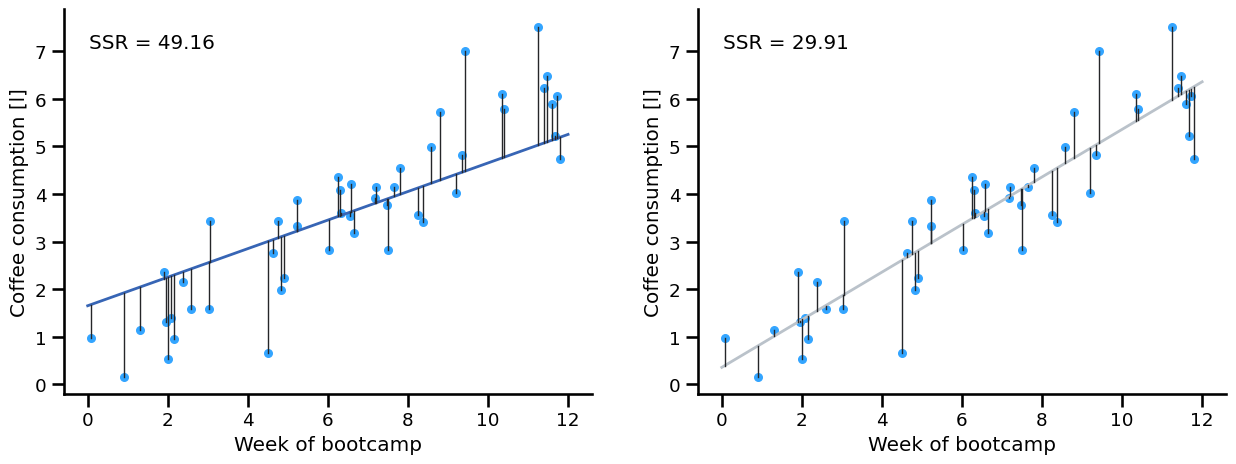

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_possible_lines_with_residuals(data['Week of bootcamp'], data['Coffee consumption in [l]'], 
                                   reg_lines, line_index=1, residuals=True, ssr=True, ax=ax[0]);
plot_possible_lines_with_residuals(data['Week of bootcamp'], data['Coffee consumption in [l]'], 
                                   reg_lines, line_index=3, residuals=True, ssr=True, ax=ax[1]);

Notes: Could we also use the absolute error values instead of squaring? (yes, but with numerical disadvantages (not differentiable &rarr; GD))

### Trying out several fitted lines

By comparing the sum of squared residuals (SSR) we can find out which one is better:

$$ J(b_{0},b_{1})\,=\,\sum_i^n e_{i}^{2}\,=\,\sum_i^n(y_{i}\,-\,\hat{y}_{i})^{2}\,=\,\sum_i^n(y_{i}\,-\,(b_{0}\,+\,b_{1}x_{i}))^{2}$$

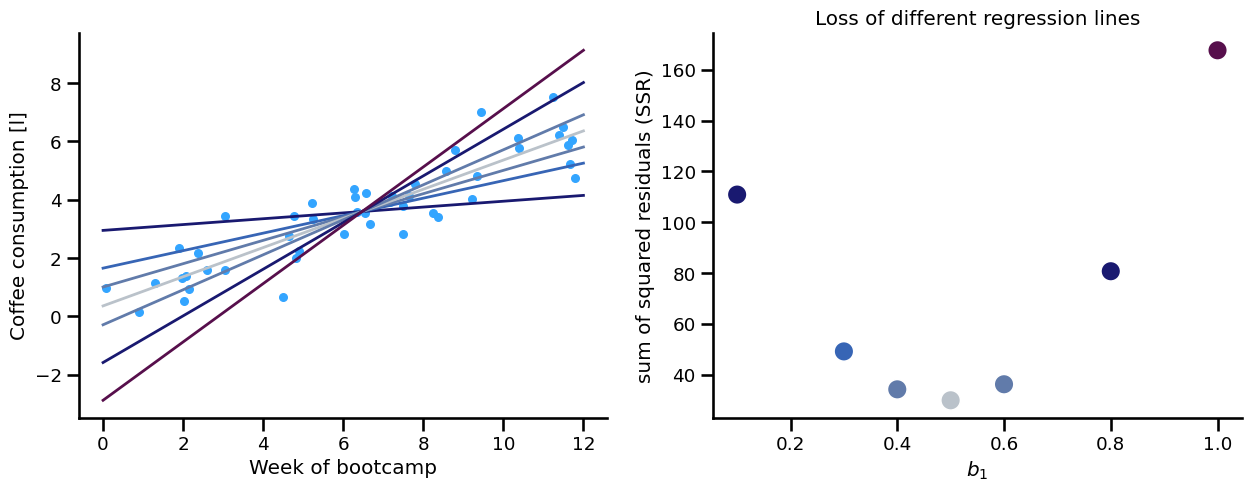

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_data(data['Week of bootcamp'], data['Coffee consumption in [l]'], 
          reg_data=reg_lines, residuals=False, ax=ax[0])
loss_reg_lines(reg_lines, ax=ax[1])

Notes:  
The loss is a function (&rarr; objective function) which depends on the slope b1 (among others). Modifying the slope alters the loss.  
We want to find the one slope (of the infinite possibilities) that results in the smallest loss because this gives the overall best estimate for all days of the bootcamp.  
It can be calculated analytically.  
But as we also have to find the optimal intercept b0 and when it comes to many features, we might have to find even more optimal parameters which might influence each other. This would make an analytical solution complicated and expensive. &rarr; use a numerical one (lecture after next, Gradient Descent) 

### BUT THERE CAN BE AN INFINITE NUMBER OF LINES!

Notes: What does this mean? 
You can calculate how good your line is, but to find the best line you can calculate for each best line. But not feasible.  



The following slides can as well be skipped (or be shown only shortly). It's sufficient to point out that the objective is a quantitative value which can be optimized (reduced) by optimal choice of $b_0$ and $b_1$ --> Gradient Descent (separate lecture)

### So how do we do this?

* **Obviously** doing it manually is not really scalable

* We minimize the OLS-function $J(b_0 , b_1 )$ with respect to $b_0$ and $b_1$!

* OLS - Ordinary Least Squares

$$ J(b_{0},b_{1})\;=\;\sum{\left(y_{i}\:-\:b_{0}\:-\:b_{1}x_{i}\right)}^{2}\;$$






Notes: promise derivative videos from extra notebook in course curriculum
You can’t draw every line manually. Impossible
OLS: 
j(b0,b1) = Cost function. 
= Sum of residuals squared. 
This function we need to minimise, because this is optimal for the best correlation. 

### Ordinary least squares regression

$$ \mathrm{min}\ J(b_{0},b_{1})\ =\ \sum(y_{i}\ -\ b_{0}\ -\ b_{1}x_{i})^{2}$$


$$\begin{align}
\frac{\partial J}{\partial b_{0}}&=\mathrm{-2\,}\Sigma(y_{i}-b_{0}-b_{1}x_{i})\nonumber\,=\,0 \\
\frac{\partial J}{\partial b_{1}}&=\mathrm{-2\,}\Sigma x_i(y_{i}-b_{0}-b_{1}x_{i})\nonumber\,=\,0
\end{align}$$

we divide the first equation by 2n:

$$ \begin{array}{c}{{-(\bar{y}\ -\ b_{0}\ -\ b_{1}\bar{x})\ =\ 0}} \\ {{b_{0}\ =\ \bar{y}\ -\ b_{1}\bar{x}}}\end{array}$$

... more math leads to:

$$ b_1 = \frac{\Sigma(y_i - \bar{y})(x_i - \bar{x})}{\sum(x_{i} - \bar{x})^{2}} $$






<div class="alert alert-block alert-info">
<b>Note:</b> 
the delta (or d) stands for first order derivative
</div>




Notes : You can explain the simple derivation  d x2 = 2 x , d (-x )2 = -2x
Main aim is to calculate the intercept and the weights. 
Upper right: derivatives will = 1st on the left. this is the same as the right on the 
Take the upper 



partial derivatives for b0 and b1

close formula.. u need to explain what that is :D that it can be solved
linear regression is one of the models that can be solved, it will have a deterministic solution, no matter how you turn it the solution will be the same, for other models the minimum will be estimated so not necessarily the absolute minimum is found all the time

### Fun facts about residuals

<div class="group">
  <div class="text"> 
      
        
$$\begin{align}
y_i &= b_0 + b_1 \cdot x_i + e_i \\
e_i &= y_i -b_0 -b_1 \cdot x_i \\
b_0 &= \bar{y} - b_1 \cdot \bar{x}
\end{align}$$
      
  </div>
    
  <div class="images">
Which leads to the following conclusions:

$$\begin{align}
\Sigma e_i &= 0 \\
\Sigma(x_i - \bar{x}) \cdot e_i &= 0
\end{align}$$
  </div>
</div>


<div class="alert alert-block alert-info">
<b>Note:</b> 
    
* The second equation means the error/residual is
uncorrelated with the explanatory variable
    
* feel free to try this out for your models
</div>    


## Model performance

Notes: Do you remember "mean" and "variance"?

### Mean $\bar{y}=\frac{1}{n} \sum\limits_{i=1}^{n}y_{i}$  
### Variance $\sigma^2 = \frac{1}{n-1}\sum_i{(y_i-\bar{y})^2}$

<div class="group">
  <div class="images">
    <img src="../images/linear_regression/mean_variance.png" width="1000">
  </div>

</div>

Notes:  
The most simple model to predict y for any x is: using the mean of y for all x values.  
Reality (y) shows a natural variety (variance), SST, $\sigma^2$

### Sum of various squares (variance analysis)

<div class="images">
  <img src="../images/linear_regression/variance_analysis.png" width="1000"><br>
</div>

SST = total sum of squares  
SSE = explained sum of squares  
SSR = remaining sum of squares
    

<div class="alert alert-block alert-info">
<b>Note:</b> 
Being scale dependent means: that they could be
cents, kms, meters, lots of meters, lots of money,
depending on your problem.. thus you would always need to talk about the scale of y to put things into
perspective.

$0 ⪯ R^2 ⪯ 1$
    
least squares criterion ~ maximizing R2

$R^2= r^2$( you know.. the Pearson correlation coefficient)
</div>

<div>
    The terms are named differently: <b>r </b>esidual and <b>r</b>egression as well as <b>e</b>xplained and <b>e</b>rror start with the same letter.<br>
</div>

Notes: Since we have a model, we can divide our SST into two portions: SSE and SSR  
SSE is the portion of difference between mean and real value that can be explained by the regression line.  
SSR has been optimized / minimized to fit our regression line.  
R² is the explained portion (in %) of the variance. The higher the better. As it is in %, it is scale independent (e.g. km or mm does not change $R^2$).  


The different sums (SST, SSE, SSR) refer to summing up **all** data point values (left out in images for better visualization).  

The SST=SSE+SSR looks easy in this drawing. Due to squaring it, this actually is only true because the error/residual is uncorrelated with the explanatory variable (ei * sum[xi-x_mean]=0)


### Root mean squared error

$$ R M S E=~{\sqrt{{\frac{1}{n}}\sum_{i=1}^{n}\left(y_{i}-{\hat{y}}_{i}\right)^{2}}} $$


<div class="alert alert-block alert-info">
<b>Note:</b> <br>
The objective to fit the linear regression line is minimizing the sum of squared residuals (remarkable called MSE), this also optimizes the RMSE.<br>
RMSE is also used to compare performance of other ML models.

</div>

## Key Terms

### Key terms: Machine learning
#### Variables:
* Target (dependent variable, prediction, response, y)
* Feature (independent variable, explanatory/predictive variable, attribute, X)
* Observation (row, instance, example, data point)

#### Model:
* Fitted values (predicted values) - denoted with the hat notation ŷ
* Residuals (errors, e) - difference between reality and model
* Least squares (method for fitting a regression)
* Coefficients, weights (here: slope, intercept)

Notes: talk about the terminology, mention that in books it will be different, depending if statistics, engineering or economy


### But I want to use more then one feature!

## Multiple LR

mul*tiple* regression: use more than one feature for prediction  

don't necessarily explain "mulit*variate*".  
multivariate regression means predicting more than one single scalar y (of course one for each observation).  
In multivariate analysis, y is a 2d vector:  
1 dim for the obs., and 1 for the different kinds of responses. Not shown in the below explanations to reduce complexity.)

### Multiple regression

So far we’ve dealt with only one feature. Every single observation follows this expression:  $y = b_0 + b_1x + e$.  
Most of the time you will have many features.  
A more general expression for *all observations* at once and *any number of features* translates to: $ y=X b+e $  

where **y**, **b**, **e** are vectors, and **X** is a matrix.  

$$ 
y = {\left[\begin{array}{l l}{{y_{1}}}\\ {{\cdot\cdot\cdot}}\\{{\ y_{n}}}\end{array}\right]} \hspace{1cm} \ 
X = \begin{bmatrix}
1 & x_{1 1} & {{\cdot\cdot\cdot}} & x_{1 m}\\
{{\cdot\cdot\cdot}}&{{\cdot\cdot\cdot}}&{{\cdot\cdot\cdot}}&{{\cdot\cdot\cdot}} \\
1 & x_{n 1} & {{\cdot\cdot\cdot}} & x_{n m}
\end{bmatrix} \hspace{1cm}
b = \begin{bmatrix}
b_0\\
b_1\\
{{\cdot\cdot\cdot}} \\
b_m
\end{bmatrix} \hspace{1cm} \
e = {\left[\begin{array}{l l}{{e_{1}}}\\ {{\cdot\cdot\cdot}}\\{{\ e_{n}}}\end{array}\right]}
$$

$$  $$

n= number of observations, m= number of features

$x_{obs,feature} = x_{row,col} = x_{n,m}$  

$y$ and $X$ are known: They are the real data of all the observations.  
$b$ and $e$ are not (yet) known.  

<div class="alert alert-block alert-info">
<b>Note:</b> <br>
The term <i>multiple</i> refers to the <i>independant</i> variable. A model which can predict several <i>dependant</i> variables at once is called <i>multivariate</i> linear regression model.

</div>

### Normal Equation

The optimal values for $b$ ($b_0$, $b_1$, $...$, $b_m$) will usually be calculated numerically using Gradient Descent method (topic of another lecture). However, they can also be determined analytically with the so-called normal equation:  

$$b = (X^TX)^{-1}X^Ty$$   (Moore-Penrose pseudoinverse)  

#### Predictions  
Now as the $b$ are also known (determind which whatever method), we can use them for making predictions.  
$$ \hat{y} = b_0 + b_1x_1  + ... + b_mx_m $$  

Or in matrix notation:

$$\hat{y} = Xb$$  

$X$ needs to be in the same format as the one used above but can have a different number of rows (e.g. only 1).  
The error term $e$ is unfortunately not known but has been minimized.



Notes: Don't worry, the usual python libraries care for the math in the background.  
But you need to understand the terms.

Notes: explanations:
economist wants to know the relationship between gdp growth and spendings


### Multiple regression &mdash; evaluation metrics (special considerations)



#### Root mean squared error (RMSE)

$$ R M S E=~{\sqrt{{\frac{1}{n}}\sum_{i=1}^{n}\left(y_{i}-{\hat{y}}_{i}\right)^{2}}} $$

&emsp; Most widely used metric to compare models (also non-multiple regr.). It is a measure of the goodness of a model.  
&emsp; *Disadvantage:* The use of many (unnecessary) features leads to a (supposedly) good fit.
    
    
 
 
#### Adjusted R squared ($adj. R^2$):
$$ a d j.\;R^{2}=1-\;\left(1-R^{2}\right)\frac{n-1}{n-p-1}$$

&emsp; with n: sample size; p: number of explanatory variables of model

&emsp; Modified version of R taking into account how many independent variables are used in the model.  
&emsp; *Method:* It penalizes the use of many features.
    



<div class="alert alert-block alert-info">
<b>Note:</b> 
RMSE - used also to compare performance to other
models trained with other ML techniques
</div>

### Overview of LR terms  


- R: Pearson correlation coefficient &mdash; in the intervall between [-1, 1]
- R²: Coefficient of determination &mdash; How much of the variance in the dependent variable is explained by the model  
- MSE: mean squared error &mdash; SSR divided by sample size
- RMSE: root mean squared error &mdash; Metric to judge the goodness of a model; root of MSE    
- SST, SSE, SSR: Sum of squares: total, explained, remaining  
- $\sigma^2$: Variance of a variable &mdash; Measure of dispersion from the mean of a set



<div class="alert alert-block alert-info">
<b>Note:</b><br>
Many of these terms are similar in meaning:<br>
    * Some refer to a set's mean while others refer to a model's prediction<br>
    * Some are divided by the sample size, while others are not or by the number of DoF<br>
    * By some of them the root is pulled, by others not<br>
    * In any case: SSR &darr; means RMSE &darr; means R² &uarr; and vice versa
</div>


## References  

There are also a lot of detailed explanations in the exercise repos.

[Practical Statistics for Data Science](https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/) - Peter Bruce & Andrew
Bruce

[Econometric Methods with Applications in Business and
Economics](https://dl.rasabourse.com/Econometrics_Erasmus/Christiaan_Heij_Paul_de_Boer.pdf) - Christiaan Heij, Paul de Boer, Philip Hans
Franses, Teun Kloek, Herman K. van Dijk

[Written explanation of LR](https://learningstatisticswithr.com/book/regression.html)

[Difference between $R^2$ and the adjusted version](https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp)  

[Always welcome: Explation of LR by statquest](https://www.youtube.com/watch?v=7ArmBVF2dCs)





### Some more math for those who want to know how to calculate $b_1$

$-2 \Sigma x_i(y_i - b_0 - b_1x_i) = 0 $

we know that $b_0 = \bar{y} - b_1 \bar{x}$

$-2 \Sigma x_i(y_i - \bar{y} + b_1 \bar{x} - b_1x_i) = 0 $

$\Sigma(x_iy_i - x_i \bar{y} + b_1(x_i \bar{x} - x_ix_i)) = 0$

$\Sigma(x_iy_i - 2x_i \bar{y} + \bar{x}\bar{y} + b_1(-\bar{x}\bar{x} + 2x_i \bar{x} - x_ix_i)) = 0 \hspace{1cm}|\hspace{1cm} \Sigma x_i = \Sigma \bar{x} $

$\Sigma(x_iy_i - x_i \bar{y} - \bar{x}y_i + \bar{x}\bar{y} + b_1(-\bar{x}\bar{x} + 2x_i \bar{x} - x_ix_i)) = 0 \hspace{1cm}|\hspace{1cm} \Sigma x_i \bar{y}= \Sigma \bar{x}y_i = n \bar{x}\bar{y} $

$\Sigma(y_i - \bar{y})(x_i - \bar{x}) - b_1 \Sigma(x_i - \bar{x})^2 = 0 $

$b_1 = \frac{\Sigma(y_i - \bar{y})(x_i - \bar{x})}{\Sigma(x_i - \bar{x})^2} $